<a href="https://colab.research.google.com/github/shekhawatrs1834/Fake-News-Detection-Project/blob/main/Python_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import re
import string
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn import feature_extraction, linear_model, model_selection, preprocessing
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier


In [ ]:
fake = pd.read_csv('https://raw.githubusercontent.com/laxmimerit/fake-real-news-dataset/main/data/Fake.csv')

In [ ]:
fake.head(10)

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"
5,Racist Alabama Cops Brutalize Black Boy While...,The number of cases of cops brutalizing and ki...,News,"December 25, 2017"
6,"Fresh Off The Golf Course, Trump Lashes Out A...",Donald Trump spent a good portion of his day a...,News,"December 23, 2017"
7,Trump Said Some INSANELY Racist Stuff Inside ...,In the wake of yet another court decision that...,News,"December 23, 2017"
8,Former CIA Director Slams Trump Over UN Bully...,Many people have raised the alarm regarding th...,News,"December 22, 2017"
9,WATCH: Brand-New Pro-Trump Ad Features So Muc...,Just when you might have thought we d get a br...,News,"December 21, 2017"


In [ ]:
true = pd.read_csv('https://raw.githubusercontent.com/laxmimerit/fake-real-news-dataset/main/data/True.csv')

In [ ]:
true.head(10)

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"
5,"White House, Congress prepare for talks on spe...","WEST PALM BEACH, Fla./WASHINGTON (Reuters) - T...",politicsNews,"December 29, 2017"
6,"Trump says Russia probe will be fair, but time...","WEST PALM BEACH, Fla (Reuters) - President Don...",politicsNews,"December 29, 2017"
7,Factbox: Trump on Twitter (Dec 29) - Approval ...,The following statements were posted to the ve...,politicsNews,"December 29, 2017"
8,Trump on Twitter (Dec 28) - Global Warming,The following statements were posted to the ve...,politicsNews,"December 29, 2017"
9,Alabama official to certify Senator-elect Jone...,WASHINGTON (Reuters) - Alabama Secretary of St...,politicsNews,"December 28, 2017"


In [ ]:
fake['target'] = 'fake'
true['target'] = 'true'

In [ ]:
fake.tail(10)

,title,text,subject,date,target
23471,Seven Iranians freed in the prisoner swap have...,"21st Century Wire says This week, the historic...",Middle-east,"January 20, 2016",fake
23472,#Hashtag Hell & The Fake Left,By Dady Chery and Gilbert MercierAll writers ...,Middle-east,"January 19, 2016",fake
23473,Astroturfing: Journalist Reveals Brainwashing ...,Vic Bishop Waking TimesOur reality is carefull...,Middle-east,"January 19, 2016",fake
23474,The New American Century: An Era of Fraud,Paul Craig RobertsIn the last years of the 20t...,Middle-east,"January 19, 2016",fake
23475,Hillary Clinton: ‘Israel First’ (and no peace ...,Robert Fantina CounterpunchAlthough the United...,Middle-east,"January 18, 2016",fake
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016",fake
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016",fake
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016",fake
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016",fake
23480,10 U.S. Navy Sailors Held by Iranian Military ...,21st Century Wire says As 21WIRE predicted in ...,Middle-east,"January 12, 2016",fake


In [ ]:
true.tail(10)

,title,text,subject,date,target
21407,"Mata Pires, owner of embattled Brazil builder ...","SAO PAULO (Reuters) - Cesar Mata Pires, the ow...",worldnews,"August 22, 2017",true
21408,"U.S., North Korea clash at U.N. forum over nuc...",GENEVA (Reuters) - North Korea and the United ...,worldnews,"August 22, 2017",true
21409,"U.S., North Korea clash at U.N. arms forum on ...",GENEVA (Reuters) - North Korea and the United ...,worldnews,"August 22, 2017",true
21410,Headless torso could belong to submarine journ...,COPENHAGEN (Reuters) - Danish police said on T...,worldnews,"August 22, 2017",true
21411,North Korea shipments to Syria chemical arms a...,UNITED NATIONS (Reuters) - Two North Korean sh...,worldnews,"August 21, 2017",true
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017",true
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017",true
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017",true
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017",true
21416,Indonesia to buy $1.14 billion worth of Russia...,JAKARTA (Reuters) - Indonesia will buy 11 Sukh...,worldnews,"August 22, 2017",true


In [ ]:
fake.shape, true.shape

((23481, 5), (21417, 5))

In [ ]:
data = pd.concat([fake, true]).reset_index(drop = True)
data.shape

(44898, 5)

In [ ]:
from sklearn.utils import shuffle
data = shuffle(data)
data = data.reset_index(drop=True)


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44898 entries, 0 to 44897
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    44898 non-null  object
 1   text     44898 non-null  object
 2   subject  44898 non-null  object
 3   date     44898 non-null  object
 4   target   44898 non-null  object
dtypes: object(5)
memory usage: 1.7+ MB


In [ ]:
data.drop(["date"],axis=1,inplace=True)
data.head(10)


,title,text,subject,target
0,House Republicans push for contempt charges ag...,WASHINGTON (Reuters) - Republicans in the U.S....,politicsNews,true
1,Former RNC Chair Michael Steele Refuses To Vo...,Donald Trump has dragged the Republican Party ...,News,fake
2,MAD MAXINE Doubles Down On Threats Against Tru...,U.S. Rep. Maxine Waters attacked President Tru...,politics,fake
3,Women in male-dominated career fields watch a ...,LOS ANGELES (Reuters) - Dr. Linda Liau works w...,politicsNews,true
4,"5-STAR MOOCH, HER TAXPAYER FUNDED MOM And Mery...",One of the countries Mooch and her taxpayer fu...,politics,fake
5,WATCH: Internet Hilariously Mocks Trump For N...,"Once again, Donald Trump gets hilariously remi...",News,fake
6,OUT OF HER MIND! Maxine Waters: ‘Sex Actions’ ...,Maxine Waters said on MSNBC that there must be...,politics,fake
7,‘Half my family’ is here illegally!…State Sena...,https://www.youtube.com/watch?v=rUr8pYr5AXs,politics,fake
8,"The NRA Endorsed Trump, But They’d Have Ended...","Donald Trump gave a speech to the NRA, who the...",News,fake
9,Russia berates German defense minister for war...,MOSCOW (Reuters) - Russia s Defence Ministry o...,worldnews,true


In [ ]:
data.drop(["title"],axis=1,inplace=True)
data.head(10)


,text,subject,target
0,WASHINGTON (Reuters) - Republicans in the U.S....,politicsNews,true
1,Donald Trump has dragged the Republican Party ...,News,fake
2,U.S. Rep. Maxine Waters attacked President Tru...,politics,fake
3,LOS ANGELES (Reuters) - Dr. Linda Liau works w...,politicsNews,true
4,One of the countries Mooch and her taxpayer fu...,politics,fake
5,"Once again, Donald Trump gets hilariously remi...",News,fake
6,Maxine Waters said on MSNBC that there must be...,politics,fake
7,https://www.youtube.com/watch?v=rUr8pYr5AXs,politics,fake
8,"Donald Trump gave a speech to the NRA, who the...",News,fake
9,MOSCOW (Reuters) - Russia s Defence Ministry o...,worldnews,true


In [ ]:
data.drop(["subject"],axis=1,inplace=True)
data.head(10)

,text,target
0,WASHINGTON (Reuters) - Republicans in the U.S....,true
1,Donald Trump has dragged the Republican Party ...,fake
2,U.S. Rep. Maxine Waters attacked President Tru...,fake
3,LOS ANGELES (Reuters) - Dr. Linda Liau works w...,true
4,One of the countries Mooch and her taxpayer fu...,fake
5,"Once again, Donald Trump gets hilariously remi...",fake
6,Maxine Waters said on MSNBC that there must be...,fake
7,https://www.youtube.com/watch?v=rUr8pYr5AXs,fake
8,"Donald Trump gave a speech to the NRA, who the...",fake
9,MOSCOW (Reuters) - Russia s Defence Ministry o...,true


In [ ]:
data = data.sample(frac=1)

In [ ]:
data.head(10)

,text,target
43379,While speaking at the Massachusetts Institute ...,fake
15380,WASHINGTON (Reuters) - U.S. Senator John McCai...,true
40781,A power-tripping Salt Lake City cop was caught...,fake
5628,WASHINGTON (Reuters) - U.S. Vice President Mik...,true
33664,In between defending white supremacists and pa...,fake
29964,We told you so a man was having a blast peepin...,fake
27867,One Donald Trump supporter just realized that ...,fake
26641,The FBI finally delivered a dose of karma to a...,fake
18345,,fake
30933,Sarah Palin is stupid. Really stupid. Imagine ...,fake


In [ ]:
data.isnull().sum()

,0
text,0
target,0


In [ ]:
def punctuation_removal(text):
    all_list = [char for char in text if char not in string.punctuation]
    clean_str = ''.join(all_list)
    return clean_str

data['text'] = data['text'].apply(punctuation_removal)

In [ ]:
data.head(10)

,text,target
43379,While speaking at the Massachusetts Institute ...,fake
15380,WASHINGTON Reuters US Senator John McCain on ...,true
40781,A powertripping Salt Lake City cop was caught ...,fake
5628,WASHINGTON Reuters US Vice President Mike Pen...,true
33664,In between defending white supremacists and pa...,fake
29964,We told you so a man was having a blast peepin...,fake
27867,One Donald Trump supporter just realized that ...,fake
26641,The FBI finally delivered a dose of karma to a...,fake
18345,,fake
30933,Sarah Palin is stupid Really stupid Imagine ge...,fake


In [ ]:
data['text'] = data['text'].apply(lambda x: x.lower())
data.head(10)

,text,target
43379,while speaking at the massachusetts institute ...,fake
15380,washington reuters us senator john mccain on ...,true
40781,a powertripping salt lake city cop was caught ...,fake
5628,washington reuters us vice president mike pen...,true
33664,in between defending white supremacists and pa...,fake
29964,we told you so a man was having a blast peepin...,fake
27867,one donald trump supporter just realized that ...,fake
26641,the fbi finally delivered a dose of karma to a...,fake
18345,,fake
30933,sarah palin is stupid really stupid imagine ge...,fake


In [ ]:
X = data["text"]
Y = data["target"]

In [ ]:
X_train ,X_test ,Y_tarin, Y_test = train_test_split(X,Y, test_size =.25)

In [ ]:
X_train.head(10)

,text
36368,a white fiveyearold girl told her mother chris...
7991,london reuters british police said they have ...
20884,it s always a winwin when you can find a hobby...
41309,your daily dose of insanity a san francisco mi...
33092,erbilsulaimaniya iraq reuters kurds voted in ...
10368,21st century wire says it was a major scandal ...
16447,if you want to try to dispute dinesh d souza s...
462,washington reuters us president barack obama ...
32304,seoul reuters north korea has been moving air...
14121,pro trump chicagoans decided to hit back after...


In [ ]:
Y_tarin.head(10)

,target
36368,fake
7991,true
20884,fake
41309,fake
33092,true
10368,fake
16447,fake
462,true
32304,true
14121,fake


In [ ]:
from sklearn import metrics
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "green")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

**Decision tree classifier**

---



In [ ]:
from sklearn.tree import DecisionTreeClassifier
pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', DecisionTreeClassifier(criterion= 'entropy',
                                           max_depth = 20,
                                           splitter='best',
                                           random_state=42))])
model = pipe.fit(X_train, Y_tarin)
prediction = model.predict(X_test)
print("accuracy: {}%".format(round(accuracy_score(Y_test, prediction)*100,2)))

accuracy: 99.5%


Confusion matrix, without normalization


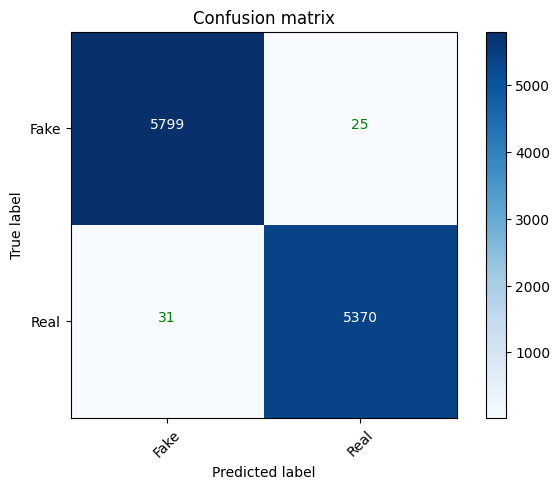

In [ ]:
cm = metrics.confusion_matrix(Y_test, prediction)
plot_confusion_matrix(cm, classes=['Fake', 'Real'])

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorization = TfidfVectorizer()
xv_train = vectorization.fit_transform(X_train)
xv_test = vectorization.fit_transform(X_test)

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
LR = LogisticRegression()
LR.fit(xv_train, Y_tarin)

LogisticRegression()

In [ ]:
LogisticRegression()

LogisticRegression()

In [ ]:
LR.score(xv_test, Y_test)

ValueError: X has 104923 features, but LogisticRegression is expecting 196379 features as input.

In [ ]:
#Gradient Boosting Classifier

In [ ]:
from sklearn.ensemble import GradientBoostingClasifier
GBC = GradientBoostingClassifier(random_state=0)
GBC.fit(xv_train, Y_tarin)

ImportError: cannot import name 'GradientBoostingClasifier' from 'sklearn.ensemble' (/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/__init__.py)